In [2]:
library(neuralnet)
library(ggplot2)
library(nnet)
library(dplyr)
library(reshape2)

Warning message:
"package 'neuralnet' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following object is masked from 'package:neuralnet':

    compute

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
library(caret)

Loading required package: lattice


In [4]:
df<- read.csv(file = "C:/q4.csv",header = TRUE,sep = ",")

In [5]:
newRow <- data.frame(x=5,y=9,Class='unowned')

In [6]:
df <- rbind(df,newRow)

In [7]:
newRow1 <- data.frame(x=5,y=10,Class='unowned')

In [8]:
df <- rbind(df,newRow1)

In [9]:
df

x,y,Class
10.5,5.0,unowned
7.5,6.0,unowned
2.0,5.0,owned
3.0,4.0,unowned
3.5,8.0,owned
6.5,6.5,owned
1.5,6.0,owned
6.5,8.0,owned
8.0,4.0,unowned
10.5,9.0,owned


In [10]:
labels <- class.ind(as.factor(df$Class))

In [11]:
f <- as.formula("unowned + owned ~ x + y")

In [12]:
standardiser <- function(x){
  (x-min(x))/(max(x)-min(x))
}

In [13]:
df[, 1:2] <- lapply(df[, 1:2], standardiser)

In [14]:
pre_process_class <- cbind(df[,1:2], labels)

In [15]:
pre_process_class

x,y,owned,unowned
1.00000000,0.1666667,0,1
0.66666667,0.3333333,0,1
0.05555556,0.1666667,1,0
0.16666667,0.0000000,0,1
0.22222222,0.6666667,1,0
0.55555556,0.4166667,1,0
0.00000000,0.3333333,1,0
0.55555556,0.6666667,1,0
0.72222222,0.0000000,0,1
1.00000000,0.8333333,1,0


In [16]:
f <- as.formula("unowned + owned ~ x + y")

In [17]:
class_net <- neuralnet(f, data =  pre_process_class, hidden = 1, act.fct = "tanh", linear.output = FALSE)

In [18]:
class_net$result.matrix

error,1.537524507
reached.threshold,0.009285008
steps,232.000000000
Intercept.to.1layhid1,0.441015713
x.to.1layhid1,-9.872593814
y.to.1layhid1,16.255291318
Intercept.to.unowned,1.222494988
1layhid1.to.unowned,-0.972204958
Intercept.to.owned,0.452401519
1layhid1.to.owned,0.513163429


In [19]:
library(tidyverse)
library(neuralnet)
library(GGally)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.4.2     v purrr   0.2.5
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::compute() masks neuralnet::compute()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()
x purrr::lift()    masks caret::lift()
Warning message:
"package 'GGally' was built under R version 3.5.3"
Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



In [117]:
install.packages("GGally",repos = "http://cran.us.r-project.org")


also installing the dependencies 'prettyunits', 'progress', 'reshape'



package 'prettyunits' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpcRGDR3\downloaded_packages


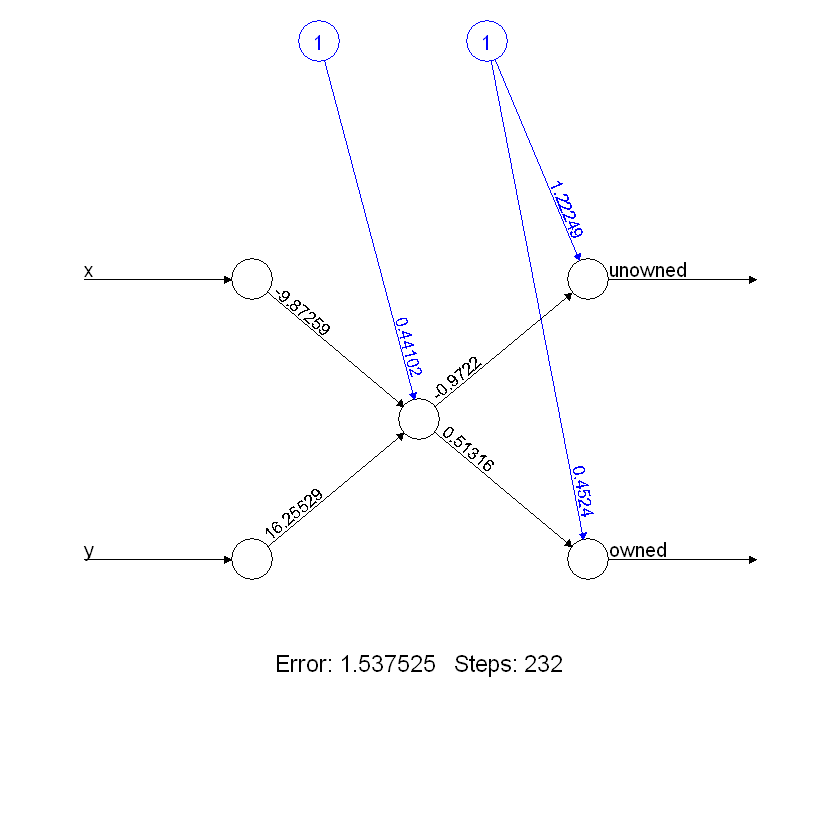

In [20]:
plot(class_net, rep = 'best')

In [124]:
# Compute predictions
compute(iris_net, pre_process_iris[, 1:2])

ERROR: Error in UseMethod("compute"): no applicable method for 'compute' applied to an object of class "nn"
